# Counting Words

This Notebook introduces some basic concepts in Python. At the end, users will be able to use their knowledge to count and plot words.

### Python Basics

When performing textual analysis we often work with sentences, like the one below.

In [1]:
sentence = 'It is a truth universally acknowledged that a single man in possession of a good fortune must be in want of a wife'

`sentence` is a dummy variable that contains our quote from Jane Austen. We needed to assign the quote to a variable (e.g. `sentence`) in order to start doing things to it with code. For example, I can add an exclamation point to the end of `sentence` like so:

In [2]:
print(sentence + '!')

It is a truth universally acknowledged that a single man in possession of a good fortune must be in want of a wife!


But what if I wanted to add an exclamation point after every word instead of at the end of the sentence? To do that I have to first "split" the sentence into words. 

In [3]:
word_list = sentence.split()

print(word_list)

['It', 'is', 'a', 'truth', 'universally', 'acknowledged', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a', 'good', 'fortune', 'must', 'be', 'in', 'want', 'of', 'a', 'wife']


Now I can do things to each word of the sentence instead of just the full sentence. 

To add an exclamation point after every word I can access each word in the list and add `!` after it. 

But, wow, that's a lot of repetitive typing.

In [4]:
print(word_list[0] + '!')
print(word_list[1] + '!')
print(word_list[2] + '!')
print(word_list[3] + '!')
print(word_list[4] + '!')
print(word_list[5] + '!')
print(word_list[6] + '!')
print(word_list[7] + '!')
print(word_list[8] + '!')
print(word_list[9] + '!')
print(word_list[10] + '!')
print(word_list[11] + '!')
print(word_list[12] + '!')
print(word_list[13] + '!')
print(word_list[14] + '!')
print(word_list[15] + '!')

It!
is!
a!
truth!
universally!
acknowledged!
that!
a!
single!
man!
in!
possession!
of!
a!
good!
fortune!


. . . and you get the point. 

Another way I could do this is with a for loop. You can read the syntax of the following for loop like this: "for every word in `word_list`, print the word with an added exclamation point." 

In [5]:
for word in word_list:
    print(word + '!')

It!
is!
a!
truth!
universally!
acknowledged!
that!
a!
single!
man!
in!
possession!
of!
a!
good!
fortune!
must!
be!
in!
want!
of!
a!
wife!


For our purposes it is not important to have a deep understanding of for loops. However, we did want to introduce them to you becuase you will see them again! (Like in this very Notebook.)

### Counting Words

Now that we understand how to work with sentences a little better, let's count words! We can use `.count()` to see how often words are mentioned.

In [6]:
word_list.count('a')

4

In [7]:
word_list.count('truth')

1

### Counting Words with "Counter"

`.count()` is useful if we want to see how often an individual word is stated in a text, but more often than not we want a word count for the entire document. 

One easy way to count all the words in a document is by using the `Counter()` command from the "collections" module. In the world of Python, a "module" is like an additional library that gives us more commands than what are typically provided by the base language. If you try to use `Counter()` without first loading the module, you will receive an error: `name 'Counter' is not defined`. 

In [9]:
from collections import Counter

In [12]:
word_count = Counter(word_list)

print(word_count)

Counter({'a': 4, 'in': 2, 'of': 2, 'It': 1, 'is': 1, 'truth': 1, 'universally': 1, 'acknowledged': 1, 'that': 1, 'single': 1, 'man': 1, 'possession': 1, 'good': 1, 'fortune': 1, 'must': 1, 'be': 1, 'want': 1, 'wife': 1})


We have to give `Counter()` a list of words or else we may not get the intended results. To see what I mean, let's try to use `Counter()` on the entire sentence instead of the word list.

In [10]:
sentence_count = Counter(sentence)

print(sentence_count)

Counter({' ': 22, 'a': 9, 'n': 9, 't': 8, 's': 8, 'e': 8, 'o': 8, 'i': 7, 'u': 4, 'l': 4, 'f': 4, 'r': 3, 'w': 3, 'd': 3, 'g': 3, 'h': 2, 'm': 2, 'I': 1, 'v': 1, 'y': 1, 'c': 1, 'k': 1, 'p': 1, 'b': 1})


We can now use `.most_common()` to see the top words and their counts. 

In [14]:
word_count.most_common(10)

[('a', 4),
 ('in', 2),
 ('of', 2),
 ('It', 1),
 ('is', 1),
 ('truth', 1),
 ('universally', 1),
 ('acknowledged', 1),
 ('that', 1),
 ('single', 1)]

### Counting Words in an Old Bailey Trial

Now let's put our knowledge of words counts to the test! We are now going to count the words in an Old Bailey Trial from 1911. (You can put that put that URL in your browser to see which trial we are working with.)

The following code "scrapes" the trial text from the web page's HTML so that we can the count words. 

In [15]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.oldbaileyonline.org/browse.jsp?id=t19110228-43&div=t19110228-43'

source = requests.get(url)

page_content = BeautifulSoup(source.text, 'html.parser').find_all('p')

text = []
for paragraph in page_content:
    text.extend(paragraph.stripped_strings)

In [16]:
text[:10] # show just the first 10 items in text

["MORRISON, Stinie (29, baker), was indicted                                           for and charged on the Coroner's inquisition with the wilful murder of",
 'Leon Beron.',
 'Mr. Muir, Mr. Leycester, and Mr. Oddie prosecuted; Mr. Abinger, Mr. Macgregor (and subsequently Mr. Roland Oliver) defended.',
 'Police-constable',
 'DAVID DAVIS',
 ', 545 W, proved plans.',
 'Police-constable',
 'JOSEPH MUMFORD',
 ', 863 W. At 8.10 a.m. on January 1 I was on duty on Clapham Common. Walking along the path that leads from the bandstand to Lavender Gardens I saw close to the path and lying amongst some bushes the body of a dead man. I just picked up his left hand and dropped it again. I sent for assistance, and other police officers and the divisional surgeon arrived.',
 'Cross-examined. I saw some footprints; I cannot say how many; I did not take an impression of them. There was a pool of blood at the side of the railings and a trail of blood from the railings across the path. The body had a gre

The following code cleans our scraped text by removing symbols (e.g. periods, parenthesis, commas, etc.) and returning the trial text as a list of words.

In [17]:
body_text = ''.join(text).lower()

remove = ['(', ')', '.', ',', ';', '\'']

for symbol in remove:
    body_text = body_text.replace(symbol, '')

old_bailey_word_list = body_text.split()

In [18]:
print(old_bailey_word_list[:100])

['morrison', 'stinie', '29', 'baker', 'was', 'indicted', 'for', 'and', 'charged', 'on', 'the', 'coroners', 'inquisition', 'with', 'the', 'wilful', 'murder', 'ofleon', 'beronmr', 'muir', 'mr', 'leycester', 'and', 'mr', 'oddie', 'prosecuted', 'mr', 'abinger', 'mr', 'macgregor', 'and', 'subsequently', 'mr', 'roland', 'oliver', 'defendedpolice-constabledavid', 'davis', '545', 'w', 'proved', 'planspolice-constablejoseph', 'mumford', '863', 'w', 'at', '810', 'am', 'on', 'january', '1', 'i', 'was', 'on', 'duty', 'on', 'clapham', 'common', 'walking', 'along', 'the', 'path', 'that', 'leads', 'from', 'the', 'bandstand', 'to', 'lavender', 'gardens', 'i', 'saw', 'close', 'to', 'the', 'path', 'and', 'lying', 'amongst', 'some', 'bushes', 'the', 'body', 'of', 'a', 'dead', 'man', 'i', 'just', 'picked', 'up', 'his', 'left', 'hand', 'and', 'dropped', 'it', 'again', 'i', 'sent', 'for']


We can now use `Counter()` and find the top words in the trial.

In [19]:
trial_count = Counter(old_bailey_word_list)

trial_count.most_common(15)

[('the', 1957),
 ('i', 1883),
 ('to', 953),
 ('and', 831),
 ('a', 708),
 ('was', 700),
 ('of', 618),
 ('in', 600),
 ('he', 535),
 ('on', 528),
 ('not', 503),
 ('that', 499),
 ('it', 452),
 ('at', 412),
 ('have', 322)]

Well . . . that's not very interesting . . . our top words are just made up things like "the" or "and." And it's very possible that any document we count will return something similar.

Analysts who work with text-as-data have a term for words like these--they're called "stop words"--and for the sake of our resesarch, we can simply remove them. 

In [21]:
stop_words = ['the', 'i', 'to', 'was', 'of', 'in', 'me', 'about', 'and', 'a', 'on', 'not', 'that', 'at', 'it', 'have', 'had', 'my',
              'with', 'for', 'is', 'did', 'as', 'there', 'from', 'or', 'were', 'been', 'but', 'they', 'when', 'went', 'do', 'this', 'two',
              'would', 'we', 'saw', 'never', 'be', 'before', 'an', 'got', 'after', 'say', 'some', 'see', 'them', 'up', 'go', 'because',
              'seen', 'no', 'came', 'out', 'asked', 'took', 'cannot', 'what', 'you', 'could', 'if', 'by', 'which', 'told', 'any', 'has',
              'put', 'are', 'then', 'other', 'mr', 'made', 'should', 'into', 'where', 'used', 'said', 'last', 'think', 'said', 'left',
              'one', 'whether', 'gave', 'only', 'am', 'pm', 'very', 'come', 'all', 'between', 'statement', 'first', 'three', 'remember',
              'every', 'who', 'take', 'can', 'said', 'know', 'him', 'his', 'her', 'hers'
              ]

To remove stop words, let's go back to `old_bailey_word_list` and do some additional cleaning. 

This time we are going to remove any word that is also in `stop_words`. The following code can be read like this: "for every word in `old_bailey_word_list` if that word is not in `stop_words`, keep it! Otherwise, don't!"

In [23]:
clean_old_bailey_word_list = []

for word in old_bailey_word_list:
    if word not in stop_words:
        clean_old_bailey_word_list.append(word)

clean_trial_count = Counter(clean_old_bailey_word_list)

In [24]:
clean_trial_count.most_common(15)

[('he', 535),
 ('prisoner', 192),
 ('street', 136),
 ('time', 112),
 ('police', 108),
 ('january', 98),
 ('exhibit', 84),
 ('night', 83),
 ('man', 82),
 ('deceased', 78),
 ('road', 68),
 ('court', 64),
 ('december', 61),
 ('murder', 60),
 ('she', 59)]

This looks much better! If you want you can remove even more words by adding them to `stop_words`.

### Visualizing Our Results

Now let's visualize our top words. Visualization is an important step in analysis becuase it makes it helps us communicate our findings to others. In the following code we take our top 25 words and plot them on a bar chart. 

In [46]:
top_words = dict(clean_trial_count.most_common(25))

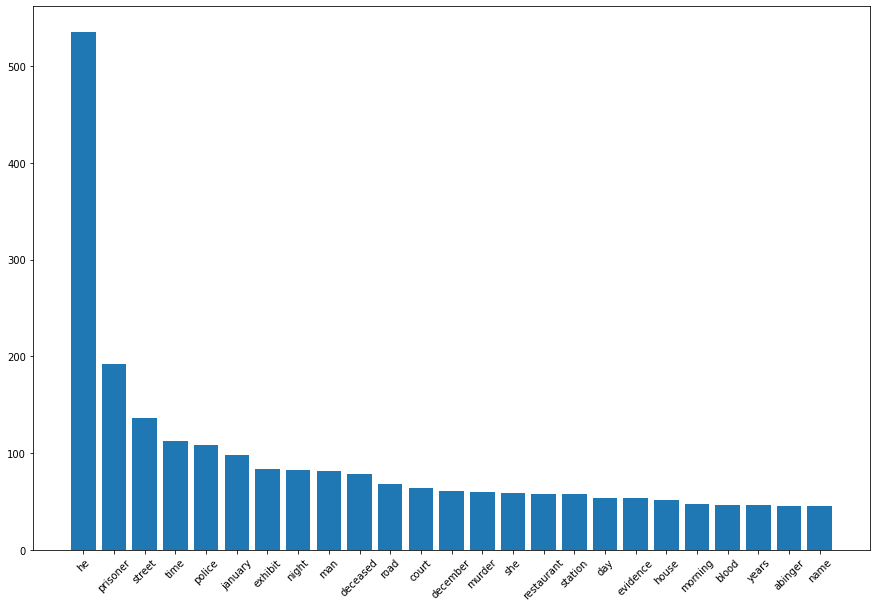

In [55]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

plt.bar(range(len(top_words)), list(top_words.values()), align='center')
plt.xticks(range(len(top_words)), list(top_words.keys()))
plt.xticks(rotation = 45)
plt.show()